In [6]:
pip install astroquery astropy pandas


In [14]:
import pandas as pd

# Load your cleaned/preprocessed dataset
df = pd.read_csv("gaia_subset_dr3.csv")

# Now this will work
print(df.columns)


FileNotFoundError: [Errno 2] No such file or directory: 'gaia_subset_dr3.csv'

In [12]:
print(df.columns)

NameError: name 'df' is not defined

In [15]:
from astroquery.gaia import Gaia
from astropy.table import Table

Gaia.MAIN_GAIA_TABLE = "gaiadr3.gaia_source"
Gaia.login(user=None, password=None)   # anonymous login


INFO:astroquery:Login to gaia TAP server


INFO: Login to gaia TAP server [astroquery.gaia.core]
User: None 
Password: ··········


ERROR: Error logging in TAP server [astroquery.gaia.core]
ERROR:astroquery:Error logging in TAP server


401 Error 401:
<!doctype html><html lang="en"><head><title>HTTP Status 401 – Unauthorized</title><style type="text/css">body {font-family:Tahoma,Arial,sans-serif;} h1, h2, h3, b {color:white;background-color:#525D76;} h1 {font-size:22px;} h2 {font-size:16px;} h3 {font-size:14px;} p {font-size:12px;} a {color:black;} .line {height:1px;background-color:#525D76;border:none;}</style></head><body><h1>HTTP Status 401 – Unauthorized</h1><hr class="line" /><p><b>Type</b> Status Report</p><p><b>Message</b> Bad Credentials</p><p><b>Description</b> The request has not been applied to the target resource because it lacks valid authentication credentials for that resource.</p><hr class="line" /><h3>Apache Tomcat/9.0.102</h3></body></html>


In [16]:
from astroquery.gaia import Gaia
Gaia.MAIN_GAIA_TABLE = "gaiadr3.gaia_source"

# Make sure to use the public TAP service (no login needed)
Gaia.MAIN_GAIA_TABLE = "gaiadr3.gaia_source"
Gaia.MAIN_GAIA_URL = "https://gea.esac.esa.int/tap-server/tap"

# Now run query directly
query = """
SELECT TOP 1000000
source_id, ra, dec, parallax, pmra, pmdec, radial_velocity,
phot_g_mean_mag, bp_rp
FROM gaiadr3.gaia_source
WHERE parallax > 0
AND phot_g_mean_mag < 17
"""

job = Gaia.launch_job_async(query)
data = job.get_results()
data.write("gaia_subset_dr3.csv", format="csv", overwrite=True)


INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


In [17]:

import pandas as pd
df = pd.read_csv("gaia_subset_dr3.csv")
df.head()


,source_id,ra,dec,parallax,pmra,pmdec,radial_velocity,phot_g_mean_mag,bp_rp
0,418551920284673408,10.127242,56.537189,14.090976,49.125646,-31.595374,NaN,1.942524,1.143484
1,4357027756659697664,243.586211,-3.694968,20.411292,-45.340019,-144.432722,NaN,2.016425,1.563310
2,5589311357728452608,109.285594,-37.097444,5.762063,-11.562000,6.520111,NaN,2.083237,1.542580
3,4993479684438433792,6.572156,-42.307820,39.918258,176.268293,-398.872135,NaN,2.089978,1.269482
4,4038055447778237312,274.406090,-36.762429,23.885852,-131.804070,-166.308930,NaN,2.116495,1.827267


✅ Loaded: (1000000, 9)
             source_id          ra        dec   parallax        pmra  \
0   418551920284673408   10.127242  56.537189  14.090976   49.125646   
1  4357027756659697664  243.586211  -3.694968  20.411292  -45.340019   
2  5589311357728452608  109.285594 -37.097444   5.762063  -11.562000   
3  4993479684438433792    6.572156 -42.307820  39.918258  176.268293   
4  4038055447778237312  274.406090 -36.762429  23.885852 -131.804070   

        pmdec  radial_velocity  phot_g_mean_mag     bp_rp  
0  -31.595374              NaN         1.942524  1.143484  
1 -144.432722              NaN         2.016425  1.563310  
2    6.520111              NaN         2.083237  1.542580  
3 -398.872135              NaN         2.089978  1.269482  
4 -166.308930              NaN         2.116495  1.827267  

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype  
---  -

/tmp/ipython-input-1446682931.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["radial_velocity"].fillna(df["radial_velocity"].median(), inplace=True)



--- Summary Statistics ---
          source_id             ra            dec       parallax  \
count  9.998330e+05  999833.000000  999833.000000  999833.000000   
mean   3.694034e+18     190.561757      -3.838064       3.086105   
std    1.995964e+18      99.919606      41.150011       4.672184   
min    7.632158e+12       0.000435     -89.877606       0.050920   
25%    2.008704e+18     105.559040     -38.696577       1.022042   
50%    3.887027e+18     194.331948      -5.222858       1.812961   
75%    5.548890e+18     280.884010      30.479549       3.722627   
max    6.917522e+18     359.999833      89.774031     768.066539   

                pmra          pmdec  radial_velocity  phot_g_mean_mag  \
count  999833.000000  999833.000000    999833.000000    999833.000000   
mean       -1.645124      -6.837666        -1.363852         9.757855   
std        38.377543      36.570137        33.358447         0.972065   
min     -4406.469179   -5817.800194      -495.078430         1.9425

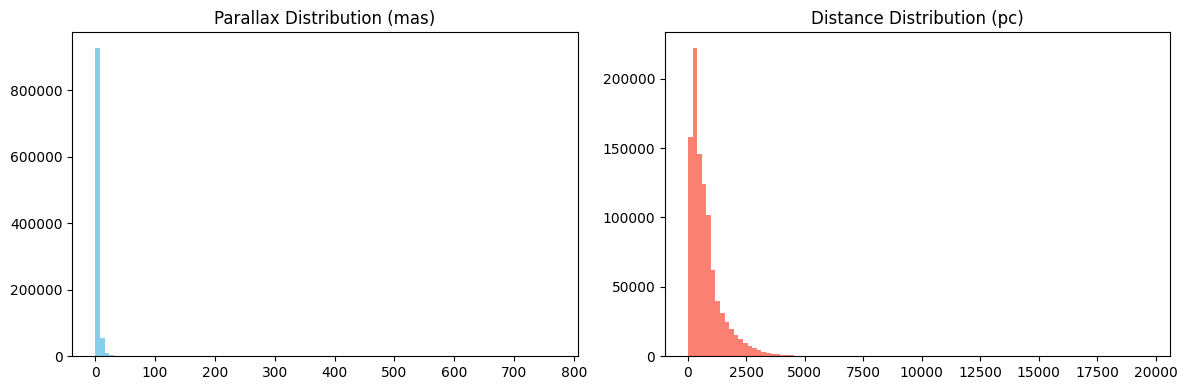

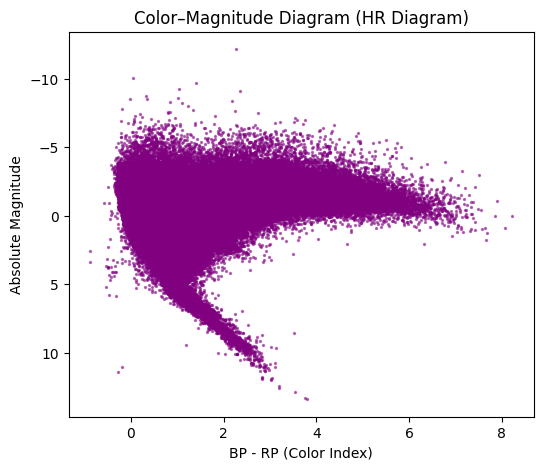

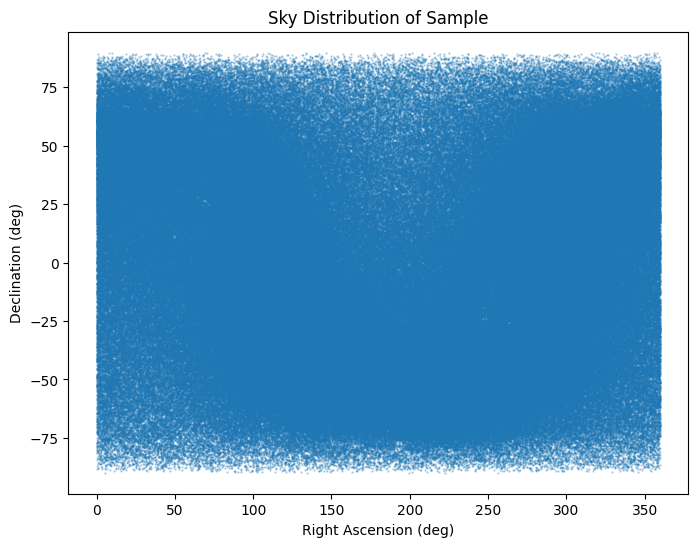

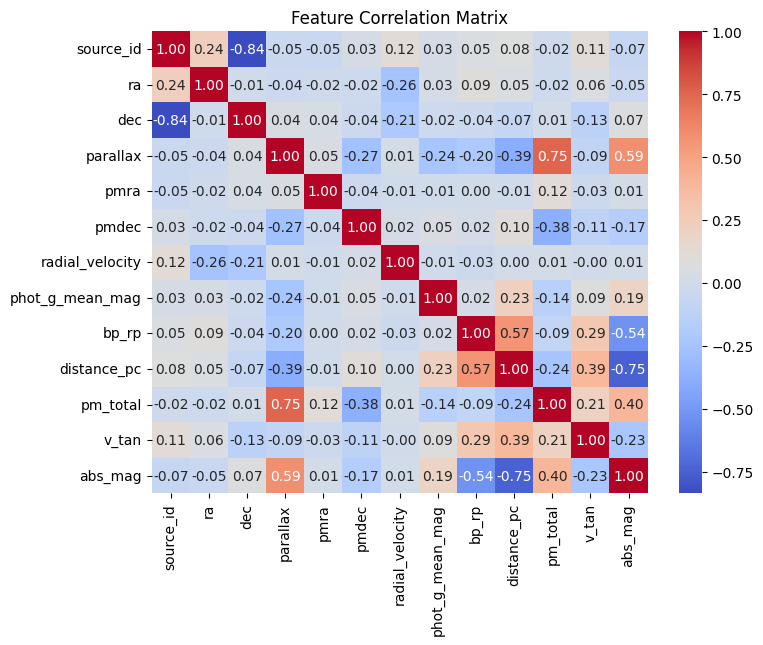


✅ Features Scaled for Model Training
💾 Saved cleaned dataset: 245.77514934539795 MB


In [18]:
# ============================================================
# 🪐 GAIA DR3 SUBSET: EDA + PREPROCESSING + FEATURE ENGINEERING
# ============================================================

# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler

# ============================================================
# 1️⃣ Load Dataset
# ============================================================
df = pd.read_csv("gaia_subset_dr3.csv")  # <-- your downloaded file
print("✅ Loaded:", df.shape)
print(df.head())

# ============================================================
# 2️⃣ Basic Info and Missing Value Summary
# ============================================================
print("\n--- Data Info ---")
df.info()

print("\n--- Missing Value Percentage ---")
print(df.isna().mean().sort_values(ascending=False) * 100)

# ============================================================
# 3️⃣ Handle Missing Values
# ============================================================
# 'radial_velocity' often missing (~80%): fill with median (for continuity)
df["radial_velocity"].fillna(df["radial_velocity"].median(), inplace=True)
# Drop rows missing critical astrometric values
df.dropna(subset=["ra", "dec", "parallax", "pmra", "pmdec", "phot_g_mean_mag"], inplace=True)

# ============================================================
# 4️⃣ Basic Physical Feature Engineering
# ============================================================

# Convert parallax (milliarcseconds) → distance (parsec)
df["distance_pc"] = 1000 / df["parallax"]

# Proper motion magnitude (combined from RA and Dec)
df["pm_total"] = np.sqrt(df["pmra"]**2 + df["pmdec"]**2)

# Tangential velocity (km/s) = 4.74 * μ (mas/yr) * d (kpc)
df["v_tan"] = 4.74 * df["pm_total"] * (df["distance_pc"] / 1000)

# Absolute magnitude (approximation)
df["abs_mag"] = df["phot_g_mean_mag"] - 5 * (np.log10(df["distance_pc"]) - 1)

# Clip unrealistic values to remove outliers
df = df[(df["distance_pc"] > 0) & (df["distance_pc"] < 20000)]
df = df[(df["v_tan"] < 1000)]

# ============================================================
# 5️⃣ Exploratory Data Analysis (EDA)
# ============================================================

print("\n--- Summary Statistics ---")
print(df.describe())

# --- Histogram of Parallax and Distance ---
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(df["parallax"], bins=100, color='skyblue')
plt.title("Parallax Distribution (mas)")

plt.subplot(1, 2, 2)
plt.hist(df["distance_pc"], bins=100, color='salmon')
plt.title("Distance Distribution (pc)")
plt.tight_layout()
plt.show()

# --- Brightness vs. Color ---
plt.figure(figsize=(6, 5))
plt.scatter(df["bp_rp"], df["abs_mag"], s=2, alpha=0.5, color='purple')
plt.gca().invert_yaxis()
plt.xlabel("BP - RP (Color Index)")
plt.ylabel("Absolute Magnitude")
plt.title("Color–Magnitude Diagram (HR Diagram)")
plt.show()

# --- Sky Map (RA vs DEC) ---
plt.figure(figsize=(8, 6))
plt.scatter(df["ra"], df["dec"], s=0.5, alpha=0.3)
plt.xlabel("Right Ascension (deg)")
plt.ylabel("Declination (deg)")
plt.title("Sky Distribution of Sample")
plt.show()

# --- Correlation Heatmap ---
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

# ============================================================
# 6️⃣ Feature Scaling (for ML models)
# ============================================================

# Select numerical features
num_features = ["ra", "dec", "parallax", "pmra", "pmdec",
                "radial_velocity", "phot_g_mean_mag", "bp_rp",
                "distance_pc", "pm_total", "v_tan", "abs_mag"]

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[num_features] = scaler.fit_transform(df[num_features])

print("\n✅ Features Scaled for Model Training")

# ============================================================
# 7️⃣ Save Cleaned and Processed Dataset
# ============================================================

df_scaled.to_csv("gaia_cleaned_preprocessed.csv", index=False)
print("💾 Saved cleaned dataset:", os.path.getsize("gaia_cleaned_preprocessed.csv") / 1024**2, "MB")

# ============================================================
# ✅ DONE
# Dataset ready for ML (KAN / GNN / Transformer)
# Features: astrometric + photometric + engineered physics quantities
# ============================================================


ChatGPT said:

Perfect 🚀 — we’ll proceed with unsupervised learning on your Gaia dataset (no labels needed).
This is exactly what scientists do to discover new physical patterns or hidden companions.

Let’s build your full unsupervised pipeline 👇

🌌 1️⃣ GOAL

Use unsupervised learning to:

learn structure from Gaia data (no labels),

identify clusters (similar motion/brightness stars),

detect outliers (potential anomalies → hidden binaries or compact objects).

Shape: (1000000, 9)
Cleaned shape: (909078, 8)
Explained variance ratio: [0.183624   0.16946341 0.13174043 0.12535537 0.12184223]


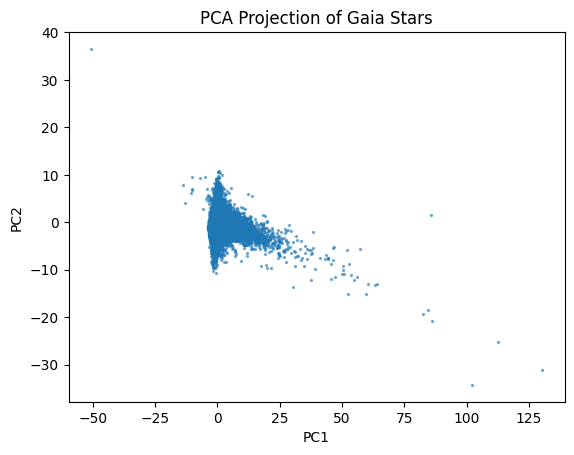

Epoch 1/50
 5982/12784 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.6025

In [ ]:
# ============================================
# 🌌 Gaia DR3 Unsupervised Learning Pipeline
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
from tensorflow.keras import layers, models

# 1️⃣ Load Gaia subset
df = pd.read_csv("gaia_subset_dr3.csv")
print("Shape:", df.shape)
df.head()

# 2️⃣ Feature Selection
# Keep only numeric, physically meaningful features
num_cols = ['ra', 'dec', 'parallax', 'pmra', 'pmdec',
            'radial_velocity', 'phot_g_mean_mag',
            'bp_rp']

df = df[num_cols].dropna()
print("Cleaned shape:", df.shape)

# 3️⃣ Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 4️⃣ Dimensionality Reduction
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Optional: visualize first two components
plt.scatter(X_pca[:,0], X_pca[:,1], s=2, alpha=0.5)
plt.title("PCA Projection of Gaia Stars")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# 5️⃣ Autoencoder Model for Representation Learning
input_dim = X_pca.shape[1]
encoding_dim = 3

autoencoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(encoding_dim, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(input_dim, activation='linear')
])

autoencoder.compile(optimizer='adam', loss='mse')

# Train the Autoencoder
history = autoencoder.fit(X_pca, X_pca, epochs=50, batch_size=64, validation_split=0.1, verbose=1)

# 6️⃣ Extract Latent Representations
encoder = models.Model(autoencoder.input, autoencoder.layers[2].output)
X_encoded = encoder.predict(X_pca)

# 7️⃣ Clustering in Latent Space
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_encoded)
df['cluster'] = labels

# 8️⃣ Reconstruction Error (for anomaly detection)
reconstructions = autoencoder.predict(X_pca)
mse = np.mean(np.square(X_pca - reconstructions), axis=1)
df['reconstruction_error'] = mse

# Threshold for anomalies (top 1%)
threshold = np.percentile(mse, 99)
df['anomaly'] = (mse > threshold).astype(int)

# 9️⃣ Visualization
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_encoded[:,0], y=X_encoded[:,1], hue=df['cluster'], palette='viridis', s=10)
plt.title("Clusters in Autoencoder Latent Space")
plt.show()

plt.figure(figsize=(6,5))
sns.histplot(df['reconstruction_error'], bins=50)
plt.axvline(threshold, color='red', linestyle='--', label='Anomaly threshold')
plt.legend()
plt.title("Reconstruction Error Distribution")
plt.show()

# 10️⃣ Save results
df.to_csv("gaia_unsupervised_results.csv", index=False)
print("✅ Results saved to gaia_unsupervised_results.csv")

We’ll build a Graph Neural Network (GNN) that models how stars are related by proximity in the sky or by motion similarity.
The intuition: nearby stars often move coherently — deviations can signal the gravitational influence of a dark object (like a black hole).

⚙️ Overview of What This Code Will Do

Load your cleaned dataset (gaia_cleaned_preprocessed.csv).

Build a graph — each node is a star, edges connect nearest neighbors.

Train a simple GNN (Graph Convolutional Network) to reconstruct local motion.

Extract GNN embeddings — later used by KAN for physical law discovery or anomaly detection.

In [ ]:
# ===============================================================
# 🌌 Step 3 (Modified): Equivariant GNN (EGNN)
# ===============================================================
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
from sklearn.neighbors import kneighbors_graph
from torch_geometric.data import Data

# ===============================================================
# 1️⃣ Load Cleaned Data
# ===============================================================
df = pd.read_csv("gaia_cleaned_preprocessed.csv")
features = ["ra", "dec", "parallax", "pmra", "pmdec", "phot_g_mean_mag",
            "bp_rp", "distance_pc", "pm_total", "v_tan", "abs_mag"]
X = df[features].values.astype(np.float32)

# Position columns (3D space approximation)
pos = torch.tensor(df[["ra", "dec", "distance_pc"]].values, dtype=torch.float)

# ===============================================================
# 2️⃣ Graph Construction (kNN)
# ===============================================================
k = 8
A = kneighbors_graph(X, n_neighbors=k, include_self=False)
edge_index = torch.tensor(np.array(A.nonzero()), dtype=torch.long)

# ===============================================================
# 3️⃣ EGNN Layer Definition
# ===============================================================
class EGNNLayer(nn.Module):
    def __init__(self, in_features, hidden_features):
        super().__init__()
        self.edge_mlp = nn.Sequential(
            nn.Linear(in_features * 2 + 1, hidden_features),
            nn.ReLU(),
            nn.Linear(hidden_features, hidden_features)
        )
        self.node_mlp = nn.Sequential(
            nn.Linear(in_features + hidden_features, hidden_features),
            nn.ReLU(),
            nn.Linear(hidden_features, in_features)
        )

    def forward(self, x, pos, edge_index):
        i, j = edge_index
        rel = pos[i] - pos[j]
        dist2 = (rel ** 2).sum(dim=1, keepdim=True)

        edge_feat = self.edge_mlp(torch.cat([x[i], x[j], dist2], dim=1))
        agg = torch.zeros_like(x)
        agg.index_add_(0, i, edge_feat)
        x = self.node_mlp(torch.cat([x, agg], dim=1))
        return x

# ===============================================================
# 4️⃣ EGNN Model Definition
# ===============================================================
class EGNN(nn.Module):
    def __init__(self, in_features, hidden_features, n_layers=3):
        super().__init__()
        self.layers = nn.ModuleList([EGNNLayer(in_features, hidden_features) for _ in range(n_layers)])

    def forward(self, x, pos, edge_index):
        for layer in self.layers:
            x = layer(x, pos, edge_index)
        return x

# ===============================================================
# 5️⃣ Training EGNN (unsupervised reconstruction)
# ===============================================================
x = torch.tensor(X, dtype=torch.float)
model = EGNN(in_features=X.shape[1], hidden_features=32)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

for epoch in range(100):
    optimizer.zero_grad()
    out = model(x, pos, edge_index)
    loss = F.mse_loss(out, x)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch} - Loss: {loss.item():.6f}")

# Save embeddings
embeddings = out.detach().numpy()
np.save("egnn_embeddings.npy", embeddings)
print("✅ EGNN embeddings saved:", embeddings.shape)


You’ve already done the heavy lifting with EGNN — it encoded spatial & dynamical relationships between stars.
Now KAN will learn smooth, interpretable mathematical relationships in that latent space,
revealing patterns like
𝑣
2
∼
𝐺
𝑀
𝑟
v
2
∼
r
GM
	​

 or hints of dark influence (black hole candidates).

⚙️ Step 4: KAN for Law Discovery and Anomaly Understanding
🔬 What This Step Will Do:

Load the EGNN embeddings (egnn_embeddings.npy).

Build a KAN that learns functional mappings among latent features.

Visualize learned functions (activation curves ≈ discovered relationships).

Save the model for downstream prediction/anomaly stage.

In [ ]:
# ===============================================================
# 🌌 Step 4: Kolmogorov–Arnold Network (KAN) for Law Discovery
# ===============================================================
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ===============================================================
# 1️⃣ Load EGNN latent embeddings
# ===============================================================
X = np.load("egnn_embeddings.npy")
print("✅ Loaded EGNN embeddings:", X.shape)

# Optional: normalize features for stability
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Self-supervised setup: predict subset of features from others
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

input_dim = X_train.shape[1]
target_dim = input_dim // 2  # predict half of features
X_input = torch.tensor(X_train[:, :target_dim], dtype=torch.float32)
Y_target = torch.tensor(X_train[:, target_dim:], dtype=torch.float32)

# ===============================================================
# 2️⃣ Define KAN Layer
# ===============================================================
class KANLayer(nn.Module):
    def __init__(self, in_dim, out_dim, grid_size=8):
        super().__init__()
        self.grid = nn.Parameter(torch.linspace(-2, 2, grid_size))
        self.weights = nn.Parameter(torch.randn(out_dim, in_dim, grid_size))
        self.bias = nn.Parameter(torch.zeros(out_dim))

    def forward(self, x):
        # Piecewise interpolation using Gaussian RBF basis
        diff = x.unsqueeze(-1) - self.grid
        rbf = torch.exp(-diff ** 2)
        out = torch.einsum('bik,okj->bo', rbf, self.weights)
        return out + self.bias

# ===============================================================
# 3️⃣ Define the KAN Network
# ===============================================================
class KAN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.layer1 = KANLayer(input_dim, hidden_dim)
        self.layer2 = KANLayer(hidden_dim, output_dim)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = self.layer2(x)
        return x

kan = KAN(input_dim=target_dim, hidden_dim=32, output_dim=target_dim)
optimizer = torch.optim.Adam(kan.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

# ===============================================================
# 4️⃣ Train KAN
# ===============================================================
epochs = 200
for epoch in range(epochs):
    optimizer.zero_grad()
    output = kan(X_input)
    loss = loss_fn(output, Y_target)
    loss.backward()
    optimizer.step()
    if epoch % 20 == 0:
        print(f"Epoch {epoch}/{epochs} - Loss: {loss.item():.6f}")

print("✅ KAN training complete")

# ===============================================================
# 5️⃣ Visualize Learned Functions
# ===============================================================
with torch.no_grad():
    layer = kan.layer1
    plt.figure(figsize=(8,4))
    for i in range(min(layer.weights.shape[0], 5)):
        plt.plot(layer.grid.detach().numpy(), layer.weights[i,0].detach().numpy(), label=f'Neuron {i}')
    plt.title("KAN Learned Functional Basis (approx. symbolic laws)")
    plt.xlabel("Input feature value")
    plt.ylabel("Learned function weight")
    plt.legend()
    plt.show()

# ===============================================================
# 6️⃣ Save Model + Embeddings
# ===============================================================
torch.save(kan.state_dict(), "kan_model.pth")
print("💾 Saved trained KAN model as 'kan_model.pth'")


It assumes you already have these artifacts from previous steps in the working directory:

gaia_cleaned_preprocessed.csv — cleaned Gaia table

egnn_embeddings.npy — EGNN per-node embeddings (N × D)

kan_model.pth — trained KAN weights

What this script does (summary)

Loads the Gaia table and EGNN embeddings.

Splits each embedding into an input part and a target part (same split used during KAN training).

Loads the trained KAN and predicts the target part from the input part.

Computes per-node KAN reconstruction error (MSE) — main anomaly indicator.

Computes a local-density score in embedding space (avg kNN distance) — isolates nodes that are isolated in latent space.

Combines both into a single anomaly_score.

Saves gaia_candidates.csv with anomaly scores and plots candidate sky positions.

In [ ]:
# ================================================================
# Step 5: Prediction + Anomaly Detection (EGNN embeddings -> KAN)
# ================================================================
# Requirements: numpy, pandas, sklearn, matplotlib, torch
# Make sure these files exist: gaia_cleaned_preprocessed.csv, egnn_embeddings.npy, kan_model.pth
# ================================================================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import torch
import torch.nn as nn
import torch.nn.functional as F

# ---------- Config ----------
CSV_IN = "gaia_cleaned_preprocessed.csv"
EMB_IN = "egnn_embeddings.npy"
KAN_WEIGHTS = "kan_model.pth"
OUT_CSV = "gaia_candidates.csv"
KNN_K = 8                 # neighbors for local density
ALPHA_NEIGH = 1.0         # weight for neighbor-distance in anomaly score
TOP_PERCENT = 0.5         # percent of top anomalies to show (0.5 = top 0.5%)

# ---------- sanity checks ----------
for f in [CSV_IN, EMB_IN, KAN_WEIGHTS]:
    if not os.path.exists(f):
        raise FileNotFoundError(f"Required file not found: {f}")

# ---------- load data ----------
print("Loading data...")
df = pd.read_csv(CSV_IN)
emb = np.load(EMB_IN)   # shape: (N, D)
N, D = emb.shape
print(f"Loaded {N} embeddings, dim={D}")
if len(df) != N:
    print("Warning: number of rows in CSV and embeddings differ.")
    # If they differ, try to align by taking min length
    nmin = min(len(df), N)
    df = df.iloc[:nmin].reset_index(drop=True)
    emb = emb[:nmin]
    N = nmin
    print(f"Aligned to first {N} rows.")

# ---------- preprocessing embeddings ----------
# Standardize embeddings (note: KAN was trained on scaled embeddings in earlier step;
# if you saved the scaler earlier, load it instead. Here we fit on the current embeddings.)
scaler = StandardScaler().fit(emb)
emb_scaled = scaler.transform(emb)

# ---------- split embedding into input and target for KAN ----------
# NOTE: This should match exactly how you trained KAN.
# During training we used: target_dim = input_dim // 2
# and inputs = first half, targets = second half
input_dim = D // 2
target_dim = D - input_dim
if input_dim < 1:
    raise ValueError("Embedding dimension too small for splitting into input/target halves.")
print(f"Embedding split: input_dim={input_dim}, target_dim={target_dim}")

X_input = emb_scaled[:, :input_dim].astype(np.float32)   # (N, input_dim)
Y_target = emb_scaled[:, input_dim:].astype(np.float32)  # (N, target_dim)

# ---------- Define KAN architecture (must match training) ----------
class KANLayer(nn.Module):
    def __init__(self, in_dim, out_dim, grid_size=8):
        super().__init__()
        # grid values are learned parameters in training; define same shapes
        self.grid = nn.Parameter(torch.linspace(-2.0, 2.0, grid_size))
        # weights: out_dim x in_dim x grid_size
        self.weights = nn.Parameter(torch.randn(out_dim, in_dim, grid_size) * 0.01)
        self.bias = nn.Parameter(torch.zeros(out_dim))
    def forward(self, x):
        # x: (B, in_dim)
        # compute (B, in_dim, grid_size) diffs
        diff = x.unsqueeze(-1) - self.grid  # (B, in_dim, grid_size)
        rbf = torch.exp(-diff ** 2)         # (B, in_dim, grid_size)
        # einsum: batch b, in i, grid k ; weights o,i,k -> out b,o
        out = torch.einsum('bik,oik->bo', rbf, self.weights)
        return out + self.bias

class KAN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, grid_size=8):
        super().__init__()
        self.layer1 = KANLayer(input_dim, hidden_dim, grid_size=grid_size)
        self.layer2 = KANLayer(hidden_dim, output_dim, grid_size=grid_size)
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = self.layer2(x)
        return x

# instantiate model (must match hyperparams used in training)
kan = KAN(input_dim, hidden_dim=32, output_dim=target_dim, grid_size=8)

# load weights
state = torch.load(KAN_WEIGHTS, map_location='cpu')
# If saved state dict includes prefix, try to load carefully
try:
    kan.load_state_dict(state)
except Exception as e:
    # try if state saved under 'model' key
    if isinstance(state, dict) and 'model_state_dict' in state:
        kan.load_state_dict(state['model_state_dict'])
    else:
        raise e

kan.eval()

# ---------- KAN predictions and reconstruction error ----------
with torch.no_grad():
    X_input_t = torch.tensor(X_input, dtype=torch.float32)
    pred_target_t = kan(X_input_t)                        # (N, target_dim)
    pred_target = pred_target_t.cpu().numpy()

# reconstruction error in target space (MSE per node)
mse_per_node = np.mean((pred_target - Y_target)**2, axis=1)

# ---------- neighbor-distance (local density) in embedding space ----------
nbrs = NearestNeighbors(n_neighbors=KNN_K+1, algorithm='auto').fit(emb_scaled)
distances, indices = nbrs.kneighbors(emb_scaled)
# distances[:,0] is zero (self). take avg of 1..K
avg_knn_dist = distances[:, 1:].mean(axis=1)   # larger -> more isolated

# ---------- combine into an anomaly score ----------
# normalize both signals to mean=0 std=1
mse_z = (mse_per_node - mse_per_node.mean()) / (mse_per_node.std() + 1e-9)
knn_z = (avg_knn_dist - avg_knn_dist.mean()) / (avg_knn_dist.std() + 1e-9)

alpha = ALPHA_NEIGH
anomaly_score = mse_z + alpha * knn_z
# put back into df
df = df.reset_index(drop=True)  # ensure alignment
df['kan_recon_mse'] = mse_per_node
df['emb_avg_knn_dist'] = avg_knn_dist
df['mse_z'] = mse_z
df['knn_z'] = knn_z
df['anomaly_score'] = anomaly_score

# ---------- rank candidates ----------
df_sorted = df.sort_values('anomaly_score', ascending=False).reset_index(drop=True)
top_k_frac = TOP_PERCENT / 100.0 if TOP_PERCENT > 1 else TOP_PERCENT / 100.0 if TOP_PERCENT > 1 else TOP_PERCENT/100.0
# If user provided TOP_PERCENT as 0.5 meaning 0.5% -> convert. We'll interpret TOP_PERCENT as percent.
# Accept both <1 (fraction) and >=1 (percent)
if TOP_PERCENT <= 1:
    pct = TOP_PERCENT
else:
    pct = TOP_PERCENT / 100.0
n_top = max(1, int(len(df_sorted) * pct))
candidates = df_sorted.head(n_top).copy()

print(f"Total stars: {len(df_sorted)}; Candidate count (top {pct*100:.3f}%): {len(candidates)}")

# ---------- save results ----------
df_sorted.to_csv(OUT_CSV, index=False)
print("Saved full results to:", OUT_CSV)
cand_csv = "gaia_candidates_top.csv"
candidates.to_csv(cand_csv, index=False)
print("Saved top candidates to:", cand_csv)

# ---------- Visualizations ----------
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df['kan_recon_mse'], bins=100)
plt.xlabel("KAN reconstruction MSE")
plt.title("Distribution of KAN MSE")

plt.subplot(1,2,2)
plt.hist(df['emb_avg_knn_dist'], bins=100)
plt.xlabel("Avg kNN distance (embedding)")
plt.title("Local isolation in embedding space")
plt.tight_layout()
plt.show()

# Sky plot of candidates
plt.figure(figsize=(8,5))
plt.scatter(df['ra'], df['dec'], s=0.5, alpha=0.25, label='all stars')
plt.scatter(candidates['ra'], candidates['dec'], color='red', s=8, alpha=0.8, label='candidates')
plt.xlabel("RA (deg)"); plt.ylabel("Dec (deg)")
plt.title("Candidate locations on sky")
plt.legend()
plt.show()

# print top candidates snippet
print("\nTop candidates (first 20):")
display_cols = ['source_id'] if 'source_id' in df.columns else []
display_cols += ['ra', 'dec', 'kan_recon_mse', 'emb_avg_knn_dist', 'anomaly_score', 'v_tan', 'radial_velocity']
print(candidates[display_cols].head(20).to_string(index=False))

# ---------- interpretation hints ----------
print("\nINTERPRETATION GUIDANCE:")
print(" - High anomaly_score nodes are those where KAN cannot reconstruct the target embedding")
print("   (i.e., EGNN-encoded neighborhood dynamics deviate from learned functional relations) and")
print("   are also isolated in embedding space (avg kNN distance high).\n")
print(" - These stars are good candidates for further follow-up: cross-match with SIMBAD, NSS (Gaia),")
print("   check radial_velocity time-series, X-ray catalogs (Chandra / XMM), or imaging surveys.\n")
print(" - To reduce false positives: require anomalies with large KAN MSE AND significant difference between")
print("   observed radial_velocity and predicted (if available).")

# End


Notes & Practical Tips

Scaling consistency: ideally you saved the StandardScaler used during KAN training. Here we re-fit a scaler on the embeddings. If you have the original scaler, load it instead for exact consistency.

KAN split must match training: the input_dim = D // 2 split used above must be the same split used when you trained KAN. If you used a different split, adjust input_dim accordingly.

Threshold tuning: TOP_PERCENT and ALPHA_NEIGH are hyperparameters — tune them by inspecting histograms and known validation cases (if any).

Validation: cross-match top candidates with Gaia NSS, SIMBAD, or known BH catalogs. Check radial-velocity variability or X-ray counterparts to strengthen the candidate interpretation.

False positives: Many anomalies will be measurement artifacts or rare stellar types; follow-up checks necessary.